# Sentiment Analysis of X Data: Understanding Public Opinion

Objective

To analyze sentiment trends on the X platform by classifying tweets into positive, neutral, or negative categories. This provides insights into public opinion regarding specific topics, trends, or events.

Research Questions

Q1 What is the overall distribution of sentiments (positive, negative, neutral) across the dataset?

Q2 How does sentiment change over time (daily/weekly trends)?

Q3 What topics or keywords are most associated with positive and negative sentiments?

Q4 Are there any noticeable spikes in sentiment corresponding to major events?

In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#! pip install WordCloud
! pip install textblob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import nltk

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00


In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\divis\AppData\Roaming\nltk_data...


True

In [7]:
df = pd.read_csv('X data.csv')

In [8]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [87]:
df['category'] = df['clean_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [88]:
df.head(5)

,clean_text,category,tweet_length,timestamp,date
0,when modi promised “minimum government maximum...,-0.300000,210,2023-01-01 00:00:00,2023-01-01
1,talk all the nonsense and continue all the dra...,0.000000,68,2023-01-01 01:00:00,2023-01-01
2,what did just say vote for modi welcome bjp t...,0.483333,117,2023-01-01 02:00:00,2023-01-01
3,asking his supporters prefix chowkidar their n...,0.150000,212,2023-01-01 03:00:00,2023-01-01
4,answer who among these the most powerful world...,0.400000,81,2023-01-01 04:00:00,2023-01-01


In [89]:
df.shape

(162975, 5)

In [12]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [13]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [14]:
df.dtypes

clean_text     object
category      float64
dtype: object

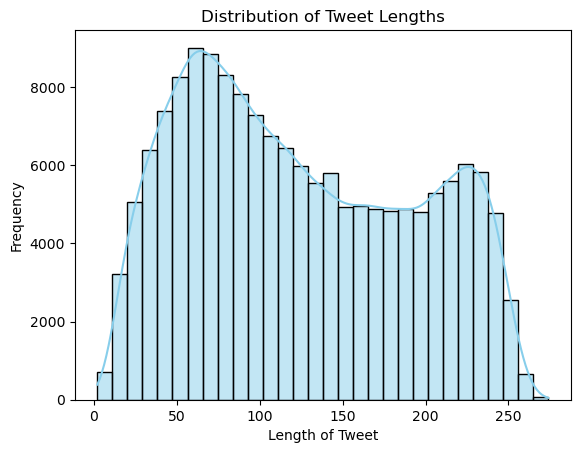

In [90]:
df['tweet_length'] = df['clean_text'].apply(lambda x: len(str(x)))
sns.histplot(df['tweet_length'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()


C:\Users\divis\AppData\Local\Temp\ipykernel_6364\2410366185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='coolwarm')


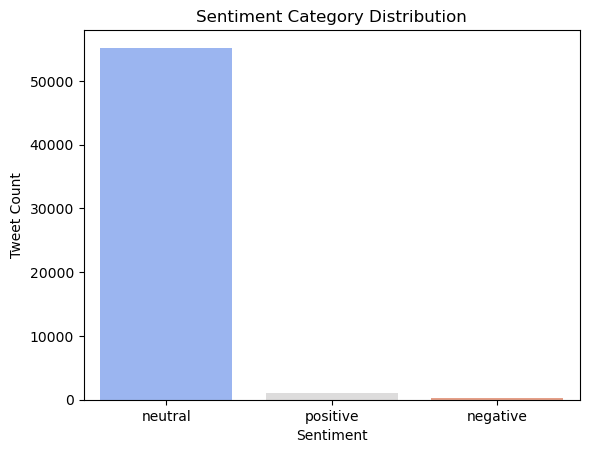

In [98]:
sns.countplot(data=df, x='category', palette='coolwarm')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

Q1. What is the overall distribution of sentiments?


Sentiment Distribution:
 category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64


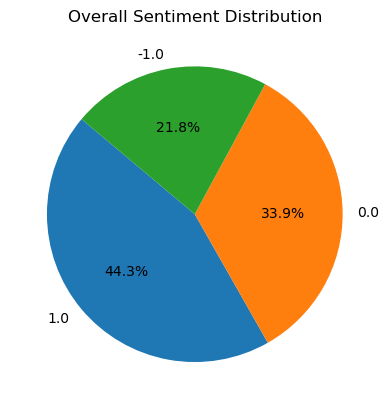

In [19]:
sentiment_counts = df['category'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=140, title='Overall Sentiment Distribution')
plt.ylabel('')
plt.show()

Q2. How does sentiment change over time?

In [22]:
import random
import datetime as dt
df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='h')
df['date'] = df['timestamp'].dt.date

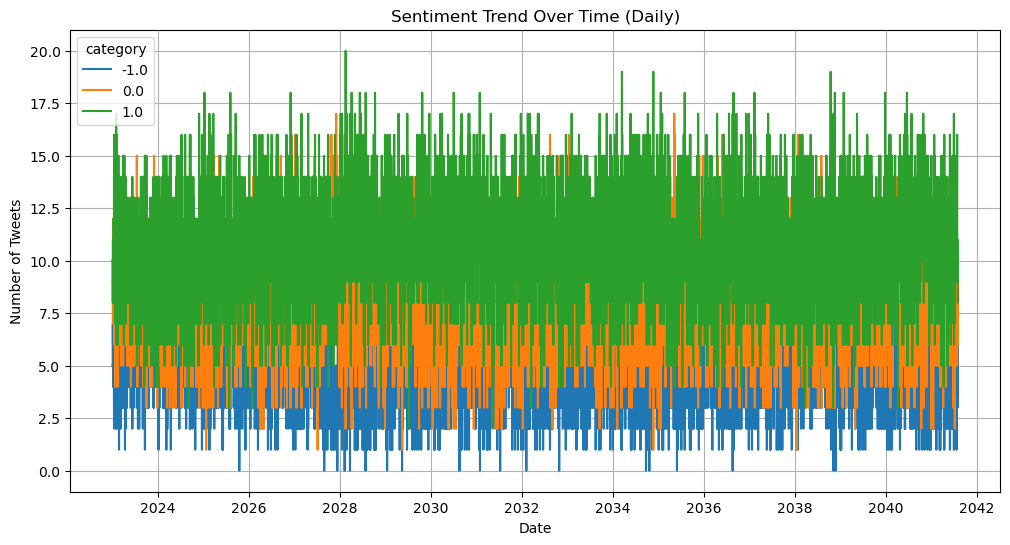

In [23]:
daily_sentiment = df.groupby(['date', 'category']).size().unstack(fill_value=0)
daily_sentiment.plot(figsize=(12, 6))
plt.title('Sentiment Trend Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

Q3. What topics or keywords are most associated with positive and negative sentiments?

In [77]:
print(df['category'].unique())
print(df['category'].dtype)

[nan]
object


In [ ]:
df['category'] = df['category'].map({
    1: 'positive',  
    0: 'neutral',  
   -1: 'negative'  
})

In [93]:
def show_wordcloud(sentiment):
    sentiment = sentiment.lower()
    text = ' '.join(df[df['category'] == sentiment]['clean_text'].dropna().astype(str))


In [94]:
def show_wordcloud(sentiment):
    sentiment = sentiment.lower()
    text = ' '.join(df[df['category'] == sentiment]['clean_text'].dropna().astype(str))
    if not text.strip():
        print(f"No tweets found for sentiment: {sentiment}")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Tweets')
    plt.show()

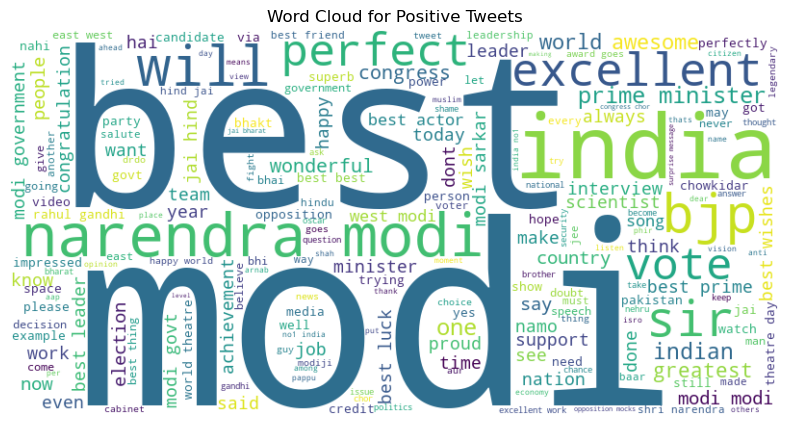

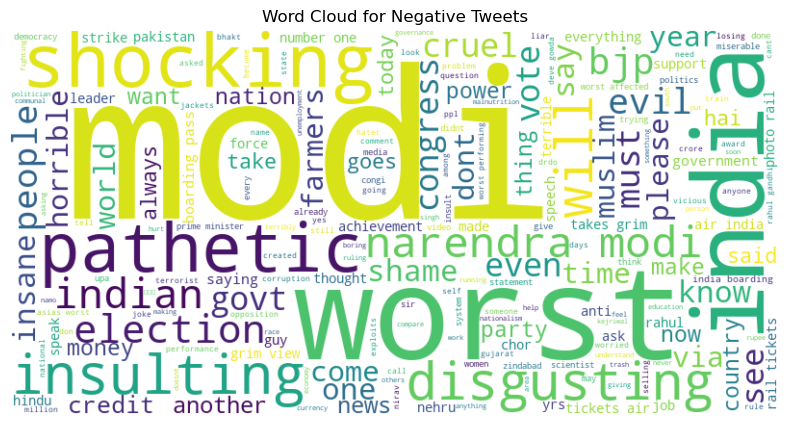

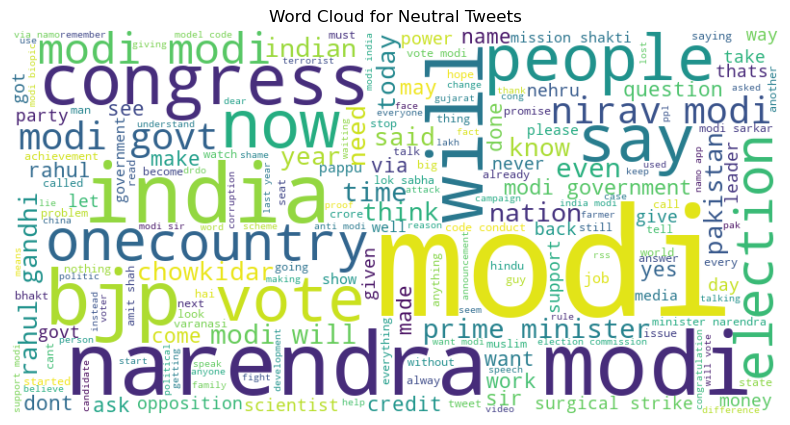

In [95]:
show_wordcloud('positive')
show_wordcloud('negative')
show_wordcloud('neutral')

In [96]:
print("Positive tweets:", df[df['category'] == 'positive'].shape[0])
print("Negative tweets:", df[df['category'] == 'negative'].shape[0])
print("Neutral tweets:", df[df['category'] == 'neutral'].shape[0])

Positive tweets: 1086
Negative tweets: 283
Neutral tweets: 55215


Q4. Are there any noticeable spikes in sentiment?

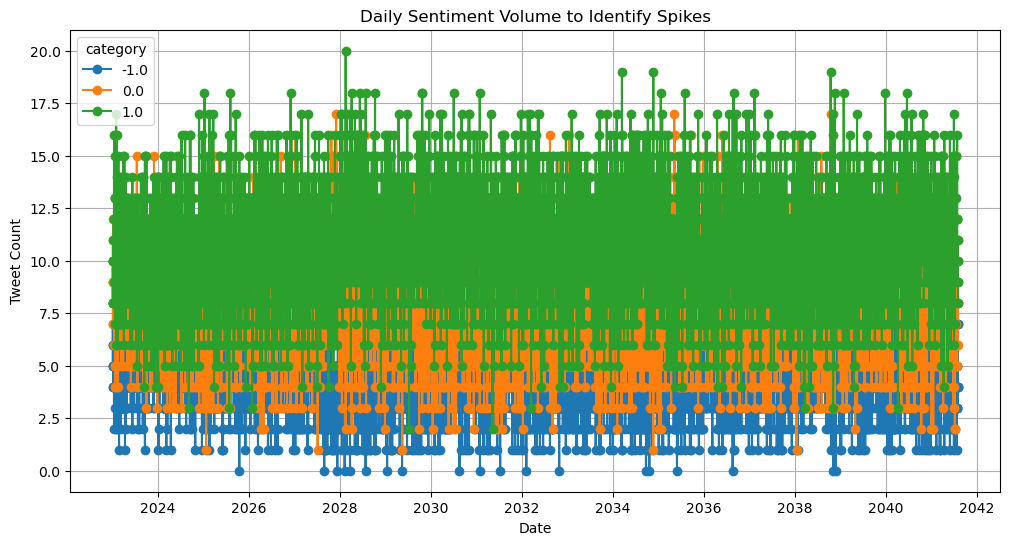

In [56]:
daily_sentiment.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Daily Sentiment Volume to Identify Spikes')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.show()

# Tools and Technologies:

The sentiment analysis leverages the following tools and libraries:

Programming Language: Python,  
Libraries:
Text Preprocessing & NLP: re, nltk, TextBlob, wordcloud,  
Data Manipulation: pandas, numpy
Visualization: matplotlib, seaborn, wordcloud

# Conclusion

Through this sentiment analysis, we delve into the emotional tone behind textual data, identifying the distribution of positive, negative, and neutral sentiments across tweets. By analyzing commonly used keywords and their sentiment polarity, we uncover public opinion patterns and the underlying themes driving sentiment. These insights can be leveraged for trend monitoring, customer feedback analysis, and building smarter recommendation or alert systems based on emotional signals.

